### 1-Read dataset

In [2]:
# import libarary 
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 

In [3]:
# delete warnings
import warnings
warnings.filterwarnings('ignore')

In [6]:
# read data
data=pd.read_csv(r'D:\ML project & tasks\Datasets\XGBOOST_Data.csv')

In [8]:
# #display first 5 row
data.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,19556,Female,Loyal Customer,52,Business travel,Eco,160,5,4,...,5,5,5,5,2,5,5,50,44.0,satisfied
1,1,90035,Female,Loyal Customer,36,Business travel,Business,2863,1,1,...,4,4,4,4,3,4,5,0,0.0,satisfied
2,2,12360,Male,disloyal Customer,20,Business travel,Eco,192,2,0,...,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,3,77959,Male,Loyal Customer,44,Business travel,Business,3377,0,0,...,1,1,1,1,3,1,4,0,6.0,satisfied
4,4,36875,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,...,2,2,2,2,4,2,4,0,20.0,satisfied


### 2-EDA

In [11]:
# show information about data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25976 entries, 0 to 25975
Data columns (total 25 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Unnamed: 0                         25976 non-null  int64  
 1   id                                 25976 non-null  int64  
 2   Gender                             25976 non-null  object 
 3   Customer Type                      25976 non-null  object 
 4   Age                                25976 non-null  int64  
 5   Type of Travel                     25976 non-null  object 
 6   Class                              25976 non-null  object 
 7   Flight Distance                    25976 non-null  int64  
 8   Inflight wifi service              25976 non-null  int64  
 9   Departure/Arrival time convenient  25976 non-null  int64  
 10  Ease of Online booking             25976 non-null  int64  
 11  Gate location                      25976 non-null  int

In [13]:
# show information about data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25976 entries, 0 to 25975
Data columns (total 25 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Unnamed: 0                         25976 non-null  int64  
 1   id                                 25976 non-null  int64  
 2   Gender                             25976 non-null  object 
 3   Customer Type                      25976 non-null  object 
 4   Age                                25976 non-null  int64  
 5   Type of Travel                     25976 non-null  object 
 6   Class                              25976 non-null  object 
 7   Flight Distance                    25976 non-null  int64  
 8   Inflight wifi service              25976 non-null  int64  
 9   Departure/Arrival time convenient  25976 non-null  int64  
 10  Ease of Online booking             25976 non-null  int64  
 11  Gate location                      25976 non-null  int

In [15]:
# display columns name
data.columns

Index(['Unnamed: 0', 'id', 'Gender', 'Customer Type', 'Age', 'Type of Travel',
       'Class', 'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')

In [17]:
# cheak missing value
data.isnull().sum()

Unnamed: 0                            0
id                                    0
Gender                                0
Customer Type                         0
Age                                   0
Type of Travel                        0
Class                                 0
Flight Distance                       0
Inflight wifi service                 0
Departure/Arrival time convenient     0
Ease of Online booking                0
Gate location                         0
Food and drink                        0
Online boarding                       0
Seat comfort                          0
Inflight entertainment                0
On-board service                      0
Leg room service                      0
Baggage handling                      0
Checkin service                       0
Inflight service                      0
Cleanliness                           0
Departure Delay in Minutes            0
Arrival Delay in Minutes             83
satisfaction                          0


In [19]:
# check duplicated
data.duplicated().sum()

0

In [21]:
# display categorical columns
categorical_columns=[]
for i in data.columns:
    if data[i].dtype=='object':
        categorical_columns.append(i)
print(categorical_columns)        

['Gender', 'Customer Type', 'Type of Travel', 'Class', 'satisfaction']


In [23]:
# display unique value in categorical columns
for i in categorical_columns:
    print(f'column name : {i}')
    print(data[i].unique())
    print('--'*40)

column name : Gender
['Female' 'Male']
--------------------------------------------------------------------------------
column name : Customer Type
['Loyal Customer' 'disloyal Customer']
--------------------------------------------------------------------------------
column name : Type of Travel
['Business travel' 'Personal Travel']
--------------------------------------------------------------------------------
column name : Class
['Eco' 'Business' 'Eco Plus']
--------------------------------------------------------------------------------
column name : satisfaction
['satisfied' 'neutral or dissatisfied']
--------------------------------------------------------------------------------


### 3-Data Preprocessing

In [29]:
# delete non important columns
data.drop(['Unnamed: 0','id'],axis=1,inplace=True)

In [33]:
# handle missing value
data.isnull().sum()

Gender                                0
Customer Type                         0
Age                                   0
Type of Travel                        0
Class                                 0
Flight Distance                       0
Inflight wifi service                 0
Departure/Arrival time convenient     0
Ease of Online booking                0
Gate location                         0
Food and drink                        0
Online boarding                       0
Seat comfort                          0
Inflight entertainment                0
On-board service                      0
Leg room service                      0
Baggage handling                      0
Checkin service                       0
Inflight service                      0
Cleanliness                           0
Departure Delay in Minutes            0
Arrival Delay in Minutes             83
satisfaction                          0
dtype: int64

In [41]:
data['Arrival Delay in Minutes'].dtype

dtype('float64')

In [47]:
# use SimpleImputer to handle missing value
from sklearn.impute import SimpleImputer

Imputer=SimpleImputer(strategy='mean')
data[['Arrival Delay in Minutes']]=Imputer.fit_transform(data[['Arrival Delay in Minutes']])

In [49]:
#  missing value
data.isnull().sum()

Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
satisfaction                         0
dtype: int64

In [51]:
# display unique value in categorical columns
for i in categorical_columns:
    print(f'column name : {i}')
    print(data[i].unique())
    print('--'*40)

column name : Gender
['Female' 'Male']
--------------------------------------------------------------------------------
column name : Customer Type
['Loyal Customer' 'disloyal Customer']
--------------------------------------------------------------------------------
column name : Type of Travel
['Business travel' 'Personal Travel']
--------------------------------------------------------------------------------
column name : Class
['Eco' 'Business' 'Eco Plus']
--------------------------------------------------------------------------------
column name : satisfaction
['satisfied' 'neutral or dissatisfied']
--------------------------------------------------------------------------------


In [53]:
# encoding categorical columns by use label encoder
from sklearn.preprocessing import LabelEncoder

encoder=LabelEncoder()
for i in categorical_columns:
    data[i]=encoder.fit_transform(data[i])

In [55]:
data.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,0,52,0,1,160,5,4,3,4,...,5,5,5,5,2,5,5,50,44.0,1
1,0,0,36,0,0,2863,1,1,3,1,...,4,4,4,4,3,4,5,0,0.0,1
2,1,1,20,0,1,192,2,0,2,4,...,2,4,1,3,2,2,2,0,0.0,0
3,1,0,44,0,0,3377,0,0,0,2,...,1,1,1,1,3,1,4,0,6.0,1
4,0,0,49,0,1,1182,2,3,4,3,...,2,2,2,2,4,2,4,0,20.0,1


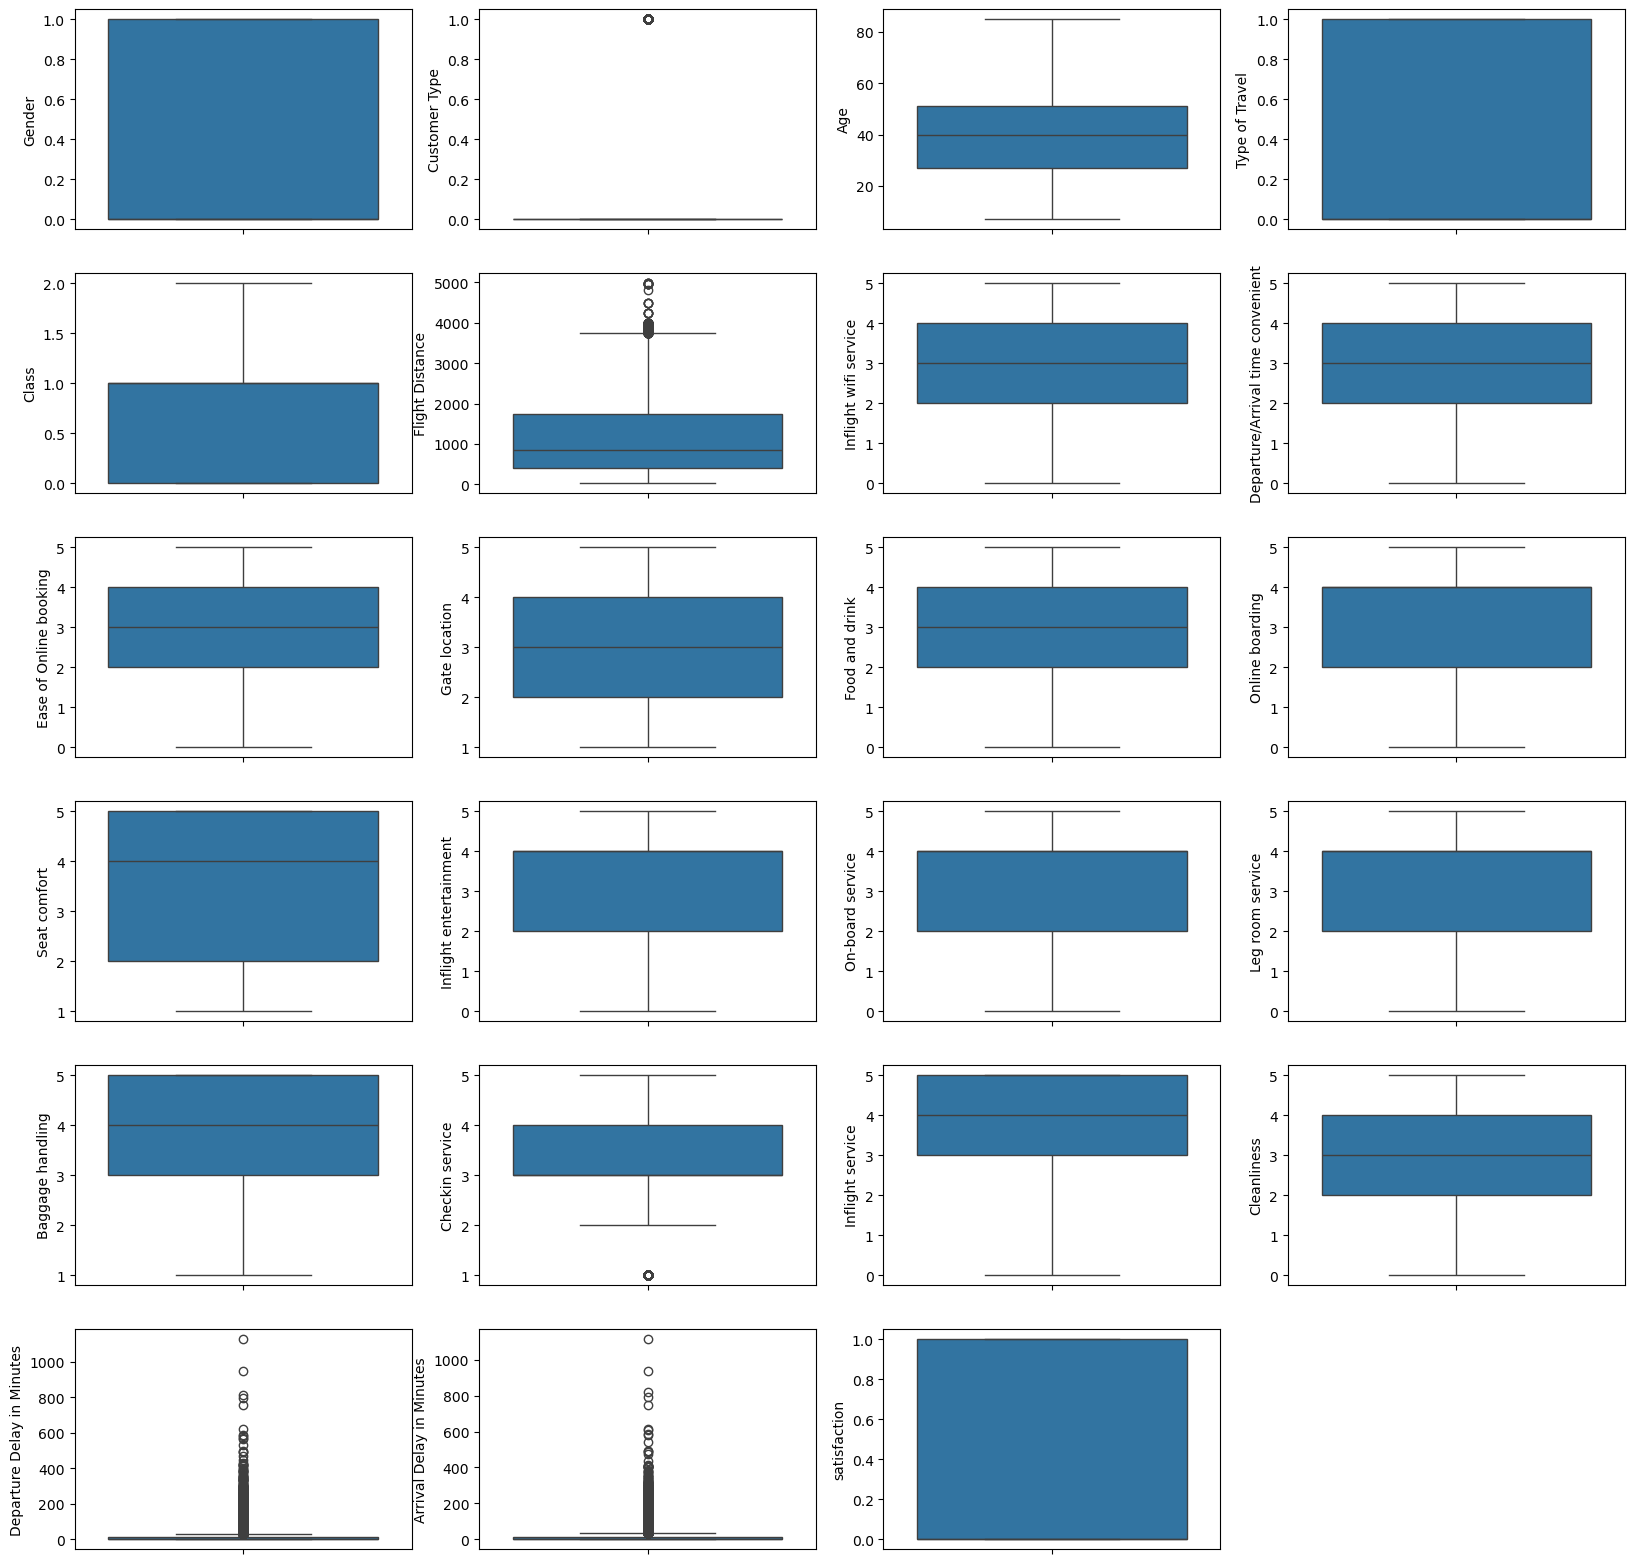

In [60]:
# plot boxplot to know outlier
plt.figure(figsize=(20,20))
s=1
for i in data.columns:
    plt.subplot(6,4,s)
    sns.boxplot(data[i])
    s+=1

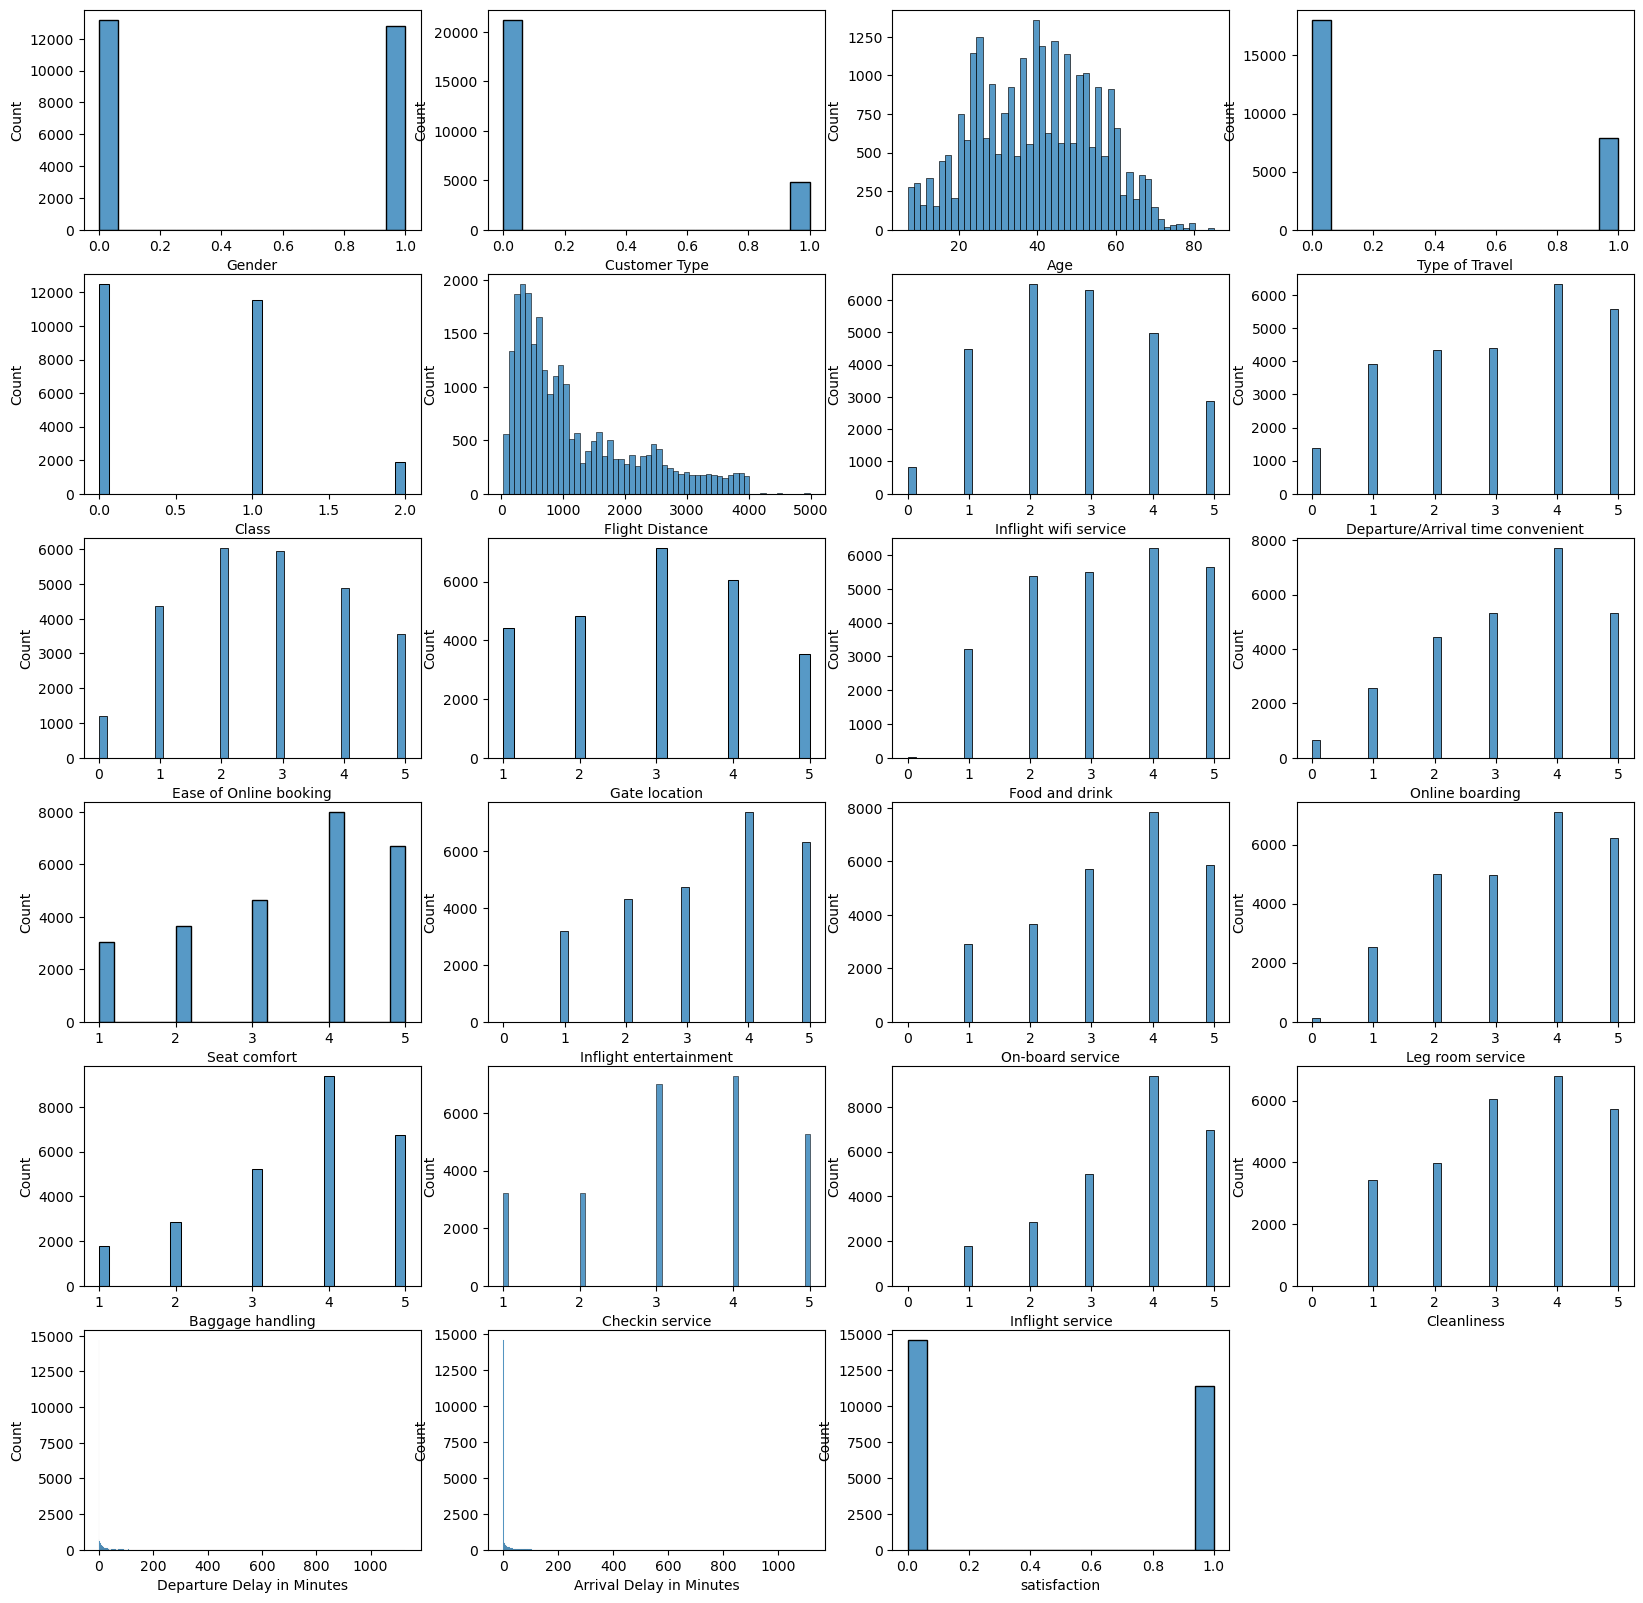

In [62]:
# plot histogram of data
plt.figure(figsize=(20,20))
s=1
for i in data.columns:
    plt.subplot(6,4,s)
    sns.histplot(data[i])
    s+=1

In [64]:
# # split data into feature(x) and label(y)
x=data.drop(['satisfaction'],axis=1)
y=data['satisfaction']

In [66]:
x.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
0,0,0,52,0,1,160,5,4,3,4,...,3,5,5,5,5,2,5,5,50,44.0
1,0,0,36,0,0,2863,1,1,3,1,...,5,4,4,4,4,3,4,5,0,0.0
2,1,1,20,0,1,192,2,0,2,4,...,2,2,4,1,3,2,2,2,0,0.0
3,1,0,44,0,0,3377,0,0,0,2,...,4,1,1,1,1,3,1,4,0,6.0
4,0,0,49,0,1,1182,2,3,4,3,...,2,2,2,2,2,4,2,4,0,20.0


In [68]:
y.head()

0    1
1    1
2    0
3    1
4    1
Name: satisfaction, dtype: int32

In [70]:
# split data into data_train and data_test
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2,shuffle=True,random_state=42)

In [72]:
print('x_train shape :',x_train.shape)
print('y_train shape :',y_train.shape)

x_train shape : (20780, 22)
y_train shape : (20780,)


In [74]:
print('x_test shape :',x_test.shape)
print('y_test shape :',y_test.shape)

x_test shape : (5196, 22)
y_test shape : (5196,)


In [76]:
# show maximum value in columns
np.max(x_train,axis=0)

Gender                                  1.0
Customer Type                           1.0
Age                                    85.0
Type of Travel                          1.0
Class                                   2.0
Flight Distance                      4983.0
Inflight wifi service                   5.0
Departure/Arrival time convenient       5.0
Ease of Online booking                  5.0
Gate location                           5.0
Food and drink                          5.0
Online boarding                         5.0
Seat comfort                            5.0
Inflight entertainment                  5.0
On-board service                        5.0
Leg room service                        5.0
Baggage handling                        5.0
Checkin service                         5.0
Inflight service                        5.0
Cleanliness                             5.0
Departure Delay in Minutes           1128.0
Arrival Delay in Minutes             1115.0
dtype: float64

In [78]:
# show miximum value in columns
np.min(x_train,axis=0)

Gender                                0.0
Customer Type                         0.0
Age                                   7.0
Type of Travel                        0.0
Class                                 0.0
Flight Distance                      31.0
Inflight wifi service                 0.0
Departure/Arrival time convenient     0.0
Ease of Online booking                0.0
Gate location                         1.0
Food and drink                        0.0
Online boarding                       0.0
Seat comfort                          1.0
Inflight entertainment                0.0
On-board service                      0.0
Leg room service                      0.0
Baggage handling                      1.0
Checkin service                       1.0
Inflight service                      0.0
Cleanliness                           0.0
Departure Delay in Minutes            0.0
Arrival Delay in Minutes              0.0
dtype: float64

In [80]:
cols=x_train.columns

In [82]:
# scalling data
from sklearn.preprocessing import MinMaxScaler

Scaler=MinMaxScaler()
x_train=Scaler.fit_transform(x_train)
x_test=Scaler.transform(x_test)

In [84]:
x_train=pd.DataFrame(x_train,columns=cols)

In [86]:
x_test=pd.DataFrame(x_test,columns=cols)

In [88]:
x_train.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
0,0.0,0.0,0.782051,1.0,0.5,0.128433,0.0,0.8,0.0,0.25,...,0.75,0.4,0.4,0.0,0.50,0.50,0.4,0.6,0.000000,0.000000
1,1.0,1.0,0.282051,0.0,0.0,0.192649,0.6,0.6,0.6,0.50,...,0.75,0.8,1.0,0.6,1.00,1.00,1.0,0.8,0.001773,0.000000
2,1.0,0.0,0.282051,0.0,0.0,0.539782,0.4,0.4,0.6,0.25,...,0.75,1.0,0.6,0.8,0.75,0.75,0.6,0.8,0.001773,0.008072
3,0.0,0.0,0.025641,1.0,0.5,0.445880,0.2,1.0,0.2,0.00,...,0.00,0.2,0.8,1.0,1.00,1.00,1.0,0.2,0.000000,0.000000
4,1.0,0.0,0.141026,1.0,0.5,0.297456,0.0,0.8,0.0,0.00,...,0.50,0.6,0.6,0.4,1.00,0.50,0.8,0.6,0.000000,0.000000


### 4-Build Model

In [91]:
# build function to get all preformance matrics
from sklearn.metrics import classification_report,accuracy_score
def evaluate_model(actual,predicted):
    report=classification_report(actual,predicted)
    accuracy=accuracy_score(actual,predicted)
    return report,accuracy

In [93]:
# import models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [95]:
# build models
models={
    'Logistic Regression':LogisticRegression(),
    'KNN':KNeighborsClassifier(),
    'Decision Tree':DecisionTreeClassifier(),
    'Random Forest':RandomForestClassifier(),
    'XGBoost':XGBClassifier()
}

In [119]:
models_list=[]
accurasy_list_test=[]
accurasy_list_train=[]
for i in range(len(list(models))):
    model=list(models.values())[i]
    # fit model
    model.fit(x_train, y_train)
    # prediction model
    y_train_pred = model.predict(x_train)
    y_test_pred = model.predict(x_test)
    # model evaluation
    train_classification_report,train_accuracy_score = evaluate_model(y_train, y_train_pred)
    test_classification_report,test_accuracy_score = evaluate_model(y_test, y_test_pred)
    print(list(models.keys())[i])
    models_list.append(list(models.keys())[i])
    print("Model training performance: ")
    print('classification_report = ',  train_classification_report)
    print('accuracy_score  = ', train_accuracy_score)
    
    print('--' * 10)
    
    print("Model testing performance: ")
    print('classification_report = ',  test_classification_report)
    print('accuracy_score  = ', test_accuracy_score)
    print('--' * 40)
    accurasy_list_test.append(test_accuracy_score)
    accurasy_list_train.append(train_accuracy_score)


Logistic Regression
Model training performance: 
classification_report =                precision    recall  f1-score   support

           0       0.87      0.90      0.89     11628
           1       0.87      0.84      0.85      9152

    accuracy                           0.87     20780
   macro avg       0.87      0.87      0.87     20780
weighted avg       0.87      0.87      0.87     20780

accuracy_score  =  0.8724735322425409
--------------------
Model testing performance: 
classification_report =                precision    recall  f1-score   support

           0       0.87      0.89      0.88      2945
           1       0.85      0.83      0.84      2251

    accuracy                           0.86      5196
   macro avg       0.86      0.86      0.86      5196
weighted avg       0.86      0.86      0.86      5196

accuracy_score  =  0.8639337952270978
--------------------------------------------------------------------------------
KNN
Model training performance: 
classifi

In [125]:
# score of model
score_data=pd.DataFrame(list(zip(models_list,accurasy_list_train,accurasy_list_test)),columns=['Model Name','accuracy_score_train','accuracy_score_test']).sort_values(by=['accuracy_score_test'],ascending=False)

In [127]:
score_data

,Model Name,accuracy_score_train,accuracy_score_test
4,XGBoost,0.993936,0.957275
3,Random Forest,1.000000,0.949577
2,Decision Tree,1.000000,0.933218
1,KNN,0.942685,0.914935
0,Logistic Regression,0.872474,0.863934


In [135]:
# use grid search to git best hyperparameter
from sklearn.model_selection import GridSearchCV

XGBoost_model=XGBClassifier()
params_XGB = {
    'booster':['gbtree','gblinear','dart'],
    'max_depth': [5, 10, 20],
    'eta': [0.01, 0.05, 0.1],     #larning rate        
}

grid=GridSearchCV(XGBoost_model,params_XGB,cv=5,scoring='accuracy',n_jobs=-1,verbose=2)
grid.fit(x_train,y_train)
best_p=grid.best_params_
print(best_p)
print(grid.best_score_)

Fitting 5 folds for each of 27 candidates, totalling 135 fits
{'booster': 'gbtree', 'eta': 0.1, 'max_depth': 20}
0.957218479307026


In [137]:
XGB_Model_g = XGBClassifier(**best_p)
XGB_Model_g.fit(x_train, y_train)
test_XGB_pred = XGB_Model_g.predict(x_test)
train_XGB_pred = XGB_Model_g.predict(x_train)
print("Testing Classification Report XGBClassifier: ")
print(classification_report(y_test, test_XGB_pred))
print("Training Classification Report XGBClassifier: ")
print(classification_report(y_train, train_XGB_pred))

Testing Classification Report XGBClassifier: 
              precision    recall  f1-score   support

           0       0.96      0.97      0.96      2945
           1       0.95      0.94      0.95      2251

    accuracy                           0.96      5196
   macro avg       0.95      0.95      0.95      5196
weighted avg       0.96      0.96      0.96      5196

Training Classification Report XGBClassifier: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     11628
           1       1.00      1.00      1.00      9152

    accuracy                           1.00     20780
   macro avg       1.00      1.00      1.00     20780
weighted avg       1.00      1.00      1.00     20780



In [139]:
prediction_data=pd.DataFrame({'Actual Value':y_test,'predicted Value':test_XGB_pred})

In [141]:
prediction_data

,Actual Value,predicted Value
13047,0,0
14975,1,1
12642,0,0
23011,1,1
13308,0,0
...,...,...
11106,1,1
10256,1,1
20216,1,1
7029,1,1
